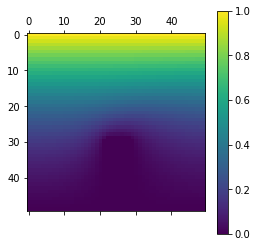

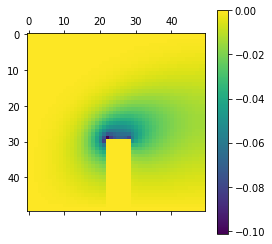

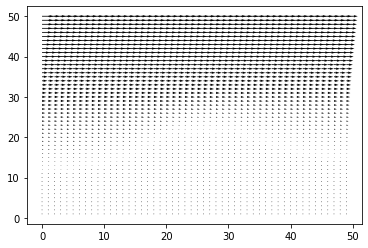

<AxesSubplot:>

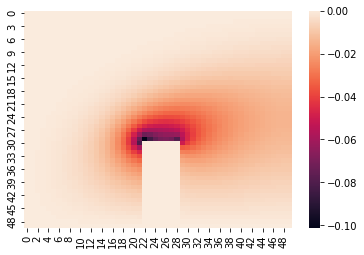

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
#CONSTANTES
#Velocidad Inicial
v0=1
#h
h=1
#Número de iteraciones
nIter=1000
#Omega
omg=1
#Ancho mallaz
nx=50
#Alto malla
ny=50
#Alto Viga
altoViga=20
#Ancho Viga
anchoViga=6
#Punto de la malla donde inicia la viga en x
inicioVigaX=int((nx-anchoViga)/2)
#Punto de la malla donde termina la viga en x
finalVigaX=int((nx+anchoViga)/2)
#Punto de la malla donde termina la viga en y (la viga nace en ny)
finalVigaY=ny-altoViga
#Velocidad en el eje x
vx=np.zeros((ny,nx))
#Velocidad en el eje y
vy=np.zeros_like(vx)
matrizRedondeada=np.zeros_like(vx)
#Presión
constantePresión=0.5
p=np.zeros_like(vx)

r=np.zeros((ny,nx))
r2=np.zeros((ny,nx))

def condiciones():
    #Condiciones de frontera
    #inlet  
    vx[:ny, 0]=vx[:ny, 1]
    vy[:ny ,0]= 0
    #outlet
    vx[:ny, nx-1]=vx[:ny,nx-2]
    vy[:ny,nx-1]=vy[:ny,nx-2]
    #surface
    vx[0,:nx]=v0
    vy[0,:nx]=0
    #E line
    vx[ny-1,:inicioVigaX-1]=0
    vy[ny-1,:inicioVigaX-1]=0
    #A line
    vx[ny-1,finalVigaX+2:nx]=0
    vy[nx-1,finalVigaX+2:nx]=0
    #Viga
    vx[finalVigaY:ny,inicioVigaX:finalVigaX+1]=0
    vy[finalVigaY:ny,inicioVigaX:finalVigaX+1]=0
    #Viga's back
    vx[finalVigaY:ny,inicioVigaX-1]=0
    vy[finalVigaY:ny,inicioVigaX-1]=(-2*(vx[finalVigaY:ny,inicioVigaX-2]-vx[finalVigaY:ny,inicioVigaX-1]))/(h*h)
    #Viga's top
    vx[finalVigaY-1,inicioVigaX:finalVigaX+1]=0
    vy[finalVigaY-1,inicioVigaX:finalVigaX+1]=(-2*(vx[finalVigaY-2,inicioVigaX:finalVigaX+1]-vx[finalVigaY-1,inicioVigaX:finalVigaX+1]))/(h*h)
    #Viga's front
    vx[finalVigaY:ny,finalVigaX+1]=0
    vy[finalVigaY:ny,finalVigaX+1]=(-2*(vx[finalVigaY:ny,finalVigaX+2]-vx[finalVigaY:ny,finalVigaX+1]))/(h*h)
    for j in range(ny):
        for i in range(nx):
            matrizRedondeada[j][i]=round(vx[j][i],2)
#Relajación Vx
for k in range(nIter+1):
    condiciones()
    for j in range(ny):
        for i in range(nx):
            matrizRedondeada[j,i]=round(vx[j][i],2)
    #print("Pre relajación:\n",vx)

    #Código relajación Vx
    if k<nIter:                                                                                                                                                           #vx[1:ny-2][1:nx-2]                                                 
        r[1:ny-1,1:nx-1]=0.25*(vx[1:ny-1,2:nx]+vx[1:ny-1,0:nx-2]+vx[2:ny,1:nx-1]+vx[0:ny-2,1:nx-1]-(h/2)*(vx[1:ny-1,1:nx-1]*(vx[1:ny-1,2:nx]-vx[1:ny-1,0:nx-2])+vy[1:ny-1,1:nx-1]*(vx[2:ny,1:nx-1]-vx[0:ny-2,1:nx-1])+(p[1:ny-1,2:nx]-p[1:ny-1,0:nx-2])))-vx[1:ny-1,1:nx-1]
        vx[1:ny-1,1:nx-1]=vx[1:ny-1,1:nx-1]+omg*r[1:ny-1,1:nx-1]
        r2[1:ny-1,1:nx-1]=0.25*(vy[1:ny-1,2:nx]+vy[1:ny-1,0:nx-2]+vy[2:ny,1:nx-1]+vy[0:ny-2,1:nx-1]-(h/2)*(vx[1:ny-1,1:nx-1]*(vy[1:ny-1,2:nx]-vy[1:ny-1,0:nx-2])+vy[1:ny-1,1:nx-1]*(vy[2:ny,1:nx-1]-vy[0:ny-2,1:nx-1])+(p[2:ny,1:nx-1]-p[0:ny-2,1:nx-1])))-vy[1:ny-1,1:nx-1]
        vy[1:ny-1,1:nx-1]=vy[1:ny-1,1:nx-1]+omg*r2[1:ny-1,1:nx-1]

# #Relajación Vy
# for k in range (nIter+1):
#     condiciones()
#     #print("Vy pre relajación:\n",vy)
#     #Código relajación Vy
#     if k<nIter:
#         r2[1:ny-1,1:nx-1]=0.25*(vy[1:ny-1,2:nx]+vy[1:ny-1,0:nx-2]+vy[2:ny,1:nx-1]+vy[0:ny-2,1:nx-1]-(h/2)*(vx[1:ny-1,1:nx-1]*(vy[1:ny-1,2:nx]-vy[1:ny-1,0:nx-2])+vy[1:ny-1,1:nx-1]*(vy[2:ny,1:nx-1]-vy[0:ny-2,1:nx-1])+(p[2:ny,1:nx-1]-p[0:ny-2,1:nx-1])))-vy[1:ny-1,1:nx-1]
#        vy[1:ny-1,1:nx-1]=vy[1:ny-1,1:nx-1]+omg*r2[1:ny-1,1:nx-1]

#redondeo
for j in range(ny):
    for i in range(nx):
        matrizRedondeada[j][i]=round(vx[j][i],2)
#print("vx:\n",matrizRedondeada)
#print("vy:\n",vy)


def prueba(m):
    dfAGraficar=pd.DataFrame(m)
    plt.matshow(dfAGraficar)
    plt.colorbar()
prueba(vx)
prueba(vy)
#grafica
x=np.zeros_like(vx)
y=np.zeros_like(vx)
for j in range(ny):
    for i in range(nx):
        x[j][i]=i
        y[j][i]=ny-j
u=vx
v=vy

plt.figure()
plt.quiver(x,y,u,v)
plt.show()
sb.heatmap(vy)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09c38f6a-ca5d-4494-bbde-d245b4951523' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>